### Conceptual Question #1: K-Means Clustering

The K-means algorithm minimizes the within-cluster variation by iteratively refining cluster assignments and centroids. Its guarantee of monotonic improvement is supported by the identity in equation (12.18):

$$
\frac{1}{|C_k|} \sum_{i, i' \in C_k} \sum_{j=1}^p (x_{ij} - x_{i'j})^2 = 2 \sum_{i \in C_k} \sum_{j=1}^p (x_{ij} - \bar{x}_{kj})^2
$$

#### (a) Proof of Identity (12.18)

Let $ \bar{x}_{kj} = \frac{1}{|C_k|} \sum_{i \in C_k} x_{ij} $ be the mean of feature $ j $ in cluster $ C_k $.  
We begin by expanding the left-hand side:

$$
\sum_{i, i' \in C_k} (x_{ij} - x_{i'j})^2 = \sum_{i, i'} \left[(x_{ij} - \bar{x}_{kj}) - (x_{i'j} - \bar{x}_{kj})\right]^2
$$

Using the identity $ (a - b)^2 = a^2 - 2ab + b^2 $, we get:

$$
\sum_{i, i'} (x_{ij} - x_{i'j})^2 = 2|C_k| \sum_{i \in C_k} (x_{ij} - \bar{x}_{kj})^2
$$

Dividing both sides by $ |C_k| $ yields:

$$
\frac{1}{|C_k|} \sum_{i, i' \in C_k} (x_{ij} - x_{i'j})^2 = 2 \sum_{i \in C_k} (x_{ij} - \bar{x}_{kj})^2
$$

Summing over all features $ j = 1, ..., p $ completes the proof.

---

#### (b) Monotonic Improvement of the Objective

The K-means objective function (12.17) is the total within-cluster variation. Equation (12.18) shows that minimizing the average pairwise squared distances within a cluster is equivalent to minimizing the sum of squared deviations from the cluster mean.

During each iteration of the algorithm:

- **Step 2(a)** computes centroids $ \bar{x}_{kj} $, which minimize the within-cluster sum of squares.
- **Step 2(b)** reassigns observations to the nearest centroid, thereby reducing or maintaining the current within-cluster variation.

Because each step either reduces or leaves unchanged the total loss, the algorithm is guaranteed to decrease the objective function until convergence to a local minimum.

**Reference:**  
James, G., Witten, D., Hastie, T., & Tibshirani, R. (2021). *An Introduction to Statistical Learning: with Applications in Python* (2nd ed.). Springer.


## Applied Question #9 – Hierarchical Clustering with USArrests

This exercise uses the `USArrests` dataset to explore hierarchical clustering techniques using complete linkage and Euclidean distance.

9. Consider the USArrests data. We will now perform hierarchical clustering on the states.
(a) Using hierarchical clustering with complete linkage and
Euclidean distance, cluster the states.
(b) Cut the dendrogram at a height that results in three distinct
clusters. Which states belong to which clusters?
12.6 Exercises 555
(c) Hierarchically cluster the states using complete linkage and Euclidean distance, after scaling the variables to have standard deviation one.
(d) What efect does scaling the variables have on the hierarchical
clustering obtained? In your opinion, should the variables be
scaled before the inter-observation dissimilarities are computed?
Provide a justifcation for your answer.

### (a) Cluster the states using hierarchical clustering with complete linkage and Euclidean distance

We begin by computing the pairwise distances between states and applying complete linkage agglomerative clustering. A dendrogram will be plotted to visualize the hierarchy.


Shape of the dataset: (50, 4)

Column names: ['Murder', 'Assault', 'UrbanPop', 'Rape']

Summary statistics:


,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000



Missing values in each column:
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64


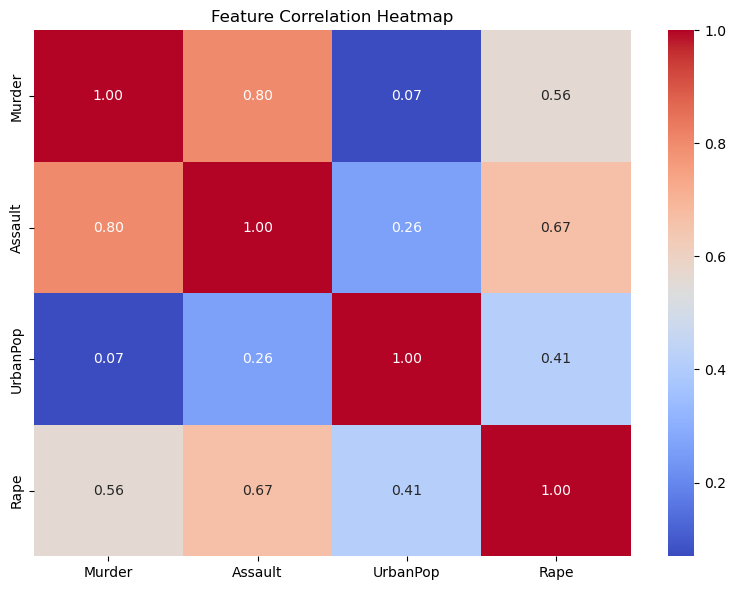

In [8]:
# === Part A: Library Imports and Exploratory Data Analysis (Unscaled) ===

# Standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Clustering tools
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Load the USArrests dataset
file_path = r"C:\Users\12292\Desktop\PhD Coursework\DDS-8555\Assignment_7\USArrests.csv"
df = pd.read_csv(file_path, index_col=0)

# Basic EDA (no changes to the data)
print("Shape of the dataset:", df.shape)
print("\nColumn names:", df.columns.tolist())
print("\nSummary statistics:")
display(df.describe())

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Pairplot of features (optional, can be slow)
# sns.pairplot(df)
# plt.suptitle("Pairwise Relationships in USArrests", y=1.02)
# plt.show()

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()


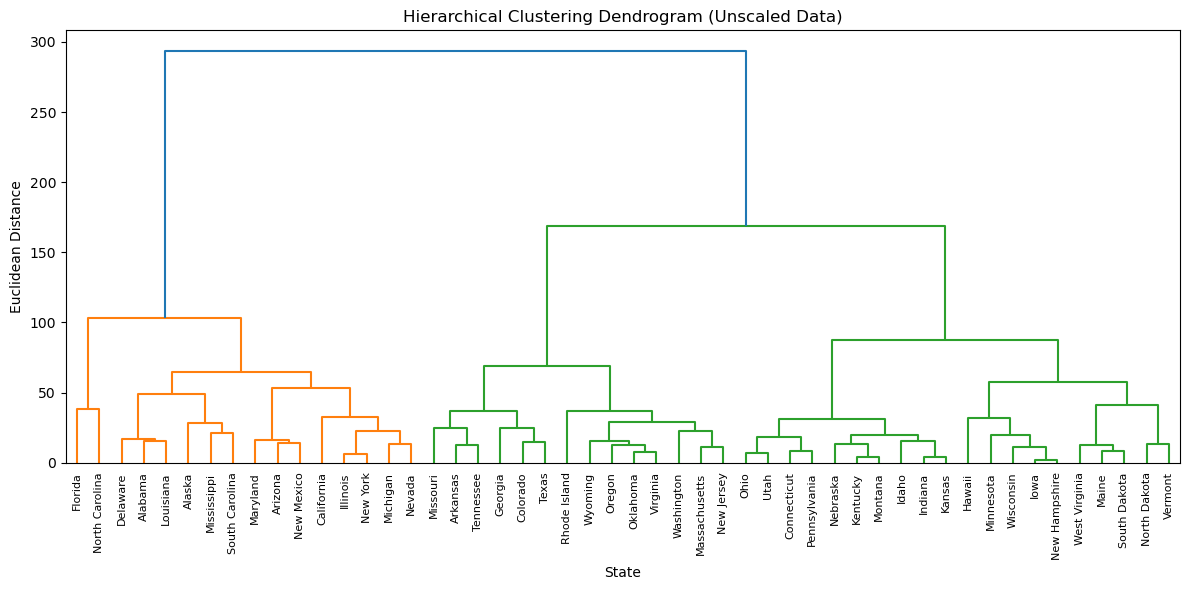

In [4]:
# === Part A: Hierarchical Clustering (Unscaled) ===

# Perform hierarchical clustering using complete linkage
Z_unscaled = linkage(df, method='complete', metric='euclidean')

# Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(Z_unscaled, labels=df.index.tolist(), leaf_rotation=90)
plt.title("Hierarchical Clustering Dendrogram (Unscaled Data)")
plt.xlabel("State")
plt.ylabel("Euclidean Distance")
plt.tight_layout()
plt.show()


### (b) Cut the dendrogram to produce 3 clusters

We cut the tree at a height that results in three distinct clusters and list which states fall into each group.



In [5]:
# === Part B: Cut dendrogram into 3 clusters ===

from scipy.cluster.hierarchy import fcluster

# Cut at 3 clusters
clusters_unscaled = fcluster(Z_unscaled, t=3, criterion='maxclust')

# Attach cluster labels to original DataFrame
df_clusters_unscaled = df.copy()
df_clusters_unscaled['Cluster'] = clusters_unscaled

# View grouped states by cluster
for i in range(1, 4):
    states_in_cluster = df_clusters_unscaled[df_clusters_unscaled['Cluster'] == i].index.tolist()
    print(f"Cluster {i} ({len(states_in_cluster)} states):")
    print(states_in_cluster)
    print()


Cluster 1 (16 states):
['Alabama', 'Alaska', 'Arizona', 'California', 'Delaware', 'Florida', 'Illinois', 'Louisiana', 'Maryland', 'Michigan', 'Mississippi', 'Nevada', 'New Mexico', 'New York', 'North Carolina', 'South Carolina']

Cluster 2 (14 states):
['Arkansas', 'Colorado', 'Georgia', 'Massachusetts', 'Missouri', 'New Jersey', 'Oklahoma', 'Oregon', 'Rhode Island', 'Tennessee', 'Texas', 'Virginia', 'Washington', 'Wyoming']

Cluster 3 (20 states):
['Connecticut', 'Hawaii', 'Idaho', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Maine', 'Minnesota', 'Montana', 'Nebraska', 'New Hampshire', 'North Dakota', 'Ohio', 'Pennsylvania', 'South Dakota', 'Utah', 'Vermont', 'West Virginia', 'Wisconsin']



### (c) Repeat clustering after scaling the variables

We standardize each variable to have mean 0 and standard deviation 1 before performing the clustering again. This ensures that variables like "Assault" and "Rape" do not dominate due to differing scales.



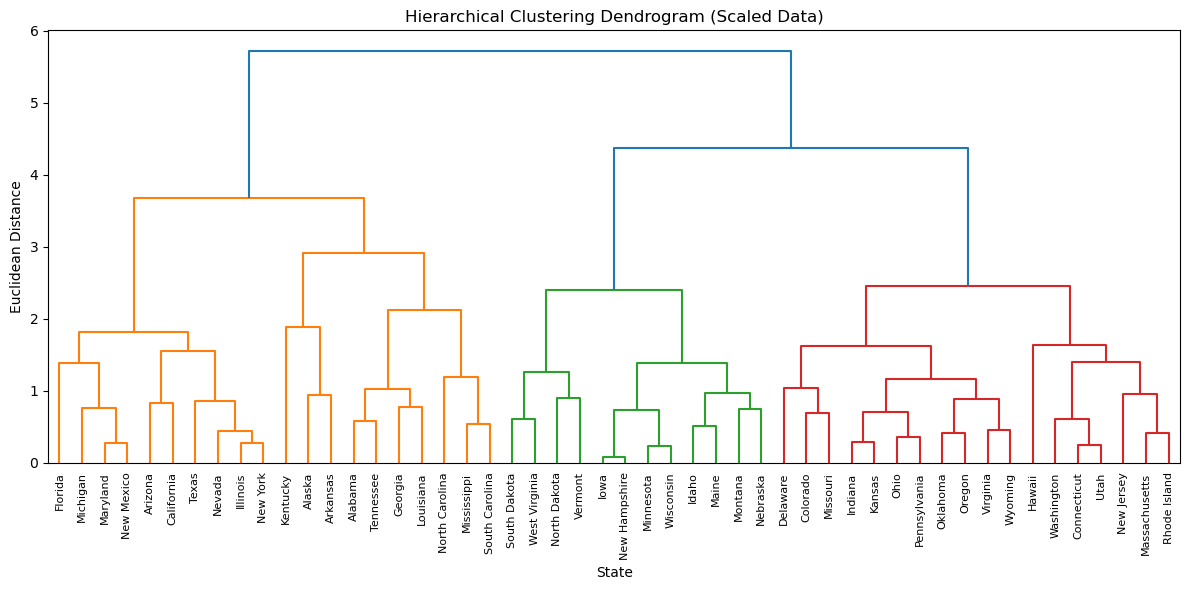

In [6]:
# === Part C: Hierarchical Clustering on Scaled Data ===

from sklearn.preprocessing import StandardScaler

# Standardize features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.iloc[:, :-1])  # exclude 'Cluster' if still in df

# Re-cluster using scaled data
Z_scaled = linkage(df_scaled, method='complete', metric='euclidean')

# Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(Z_scaled, labels=df.index.tolist(), leaf_rotation=90)
plt.title("Hierarchical Clustering Dendrogram (Scaled Data)")
plt.xlabel("State")
plt.ylabel("Euclidean Distance")
plt.tight_layout()
plt.show()


In [ ]:
# === Part C continued: Assign states to 3 scaled clusters ===

# Cut dendrogram into 3 clusters
clusters_scaled = fcluster(Z_scaled, t=3, criterion='maxclust')

# Attach cluster labels
df_clusters_scaled = df.copy()
df_clusters_scaled['Cluster'] = clusters_scaled

# Display states by cluster
for i in range(1, 4):
    states = df_clusters_scaled[df_clusters_scaled['Cluster'] == i].index.tolist()
    print(f"Cluster {i} ({len(states)} states):")
    print(states)
    print()


Cluster 1 (20 states):
['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Florida', 'Georgia', 'Illinois', 'Kentucky', 'Louisiana', 'Maryland', 'Michigan', 'Mississippi', 'Nevada', 'New Mexico', 'New York', 'North Carolina', 'South Carolina', 'Tennessee', 'Texas']

Cluster 2 (12 states):
['Idaho', 'Iowa', 'Maine', 'Minnesota', 'Montana', 'Nebraska', 'New Hampshire', 'North Dakota', 'South Dakota', 'Vermont', 'West Virginia', 'Wisconsin']

Cluster 3 (18 states):
['Colorado', 'Connecticut', 'Delaware', 'Hawaii', 'Indiana', 'Kansas', 'Massachusetts', 'Missouri', 'New Jersey', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'Utah', 'Virginia', 'Washington', 'Wyoming']



### Part (d) – Effect of Scaling and Recommendation

Scaling the variables had a significant effect on the resulting clusters. In the unscaled analysis, features with large variances—especially "Assault"—dominated the Euclidean distance calculations. This skewed the clustering toward separating states primarily by assault rates, overshadowing other features.

After standardization (scaling to mean = 0, std = 1), all four features—Murder, Assault, UrbanPop, and Rape—contributed equally to the clustering process. The new clusters reflect a more balanced profile, incorporating broader differences across multiple dimensions of violent crime and urbanization.

For example:
- **Cluster 1 (scaled)** grouped high-crime states with both high assault and murder rates (e.g., FL, NY, CA).
- **Cluster 2 (scaled)** grouped low-crime, largely rural states (e.g., SD, ME, VT).
- **Cluster 3 (scaled)** contained moderate-crime, mixed-density states (e.g., CO, OR, PA).

### Conclusion

In this context, **variables should be scaled before computing inter-observation dissimilarities**, especially when units and ranges differ substantially—as they do here. Without scaling, variables with larger standard deviations can disproportionately affect the distance metric, leading to biased clustering.

**Recommendation:** Always scale variables prior to hierarchical clustering unless domain expertise specifically justifies unequal weighting (e.g., a primary outcome variable).

**Reference:**

James, G., Witten, D., Hastie, T., & Tibshirani, R. (2021). *An Introduction to Statistical Learning: with Applications in Python* (2nd ed.). Springer.


## Part III.

Download the  Wine Data for Clustering available on Kaggle.com. Conduct PCA to collapse correlated variables into a subset that includes 80% of the variance of the entirety of the data.  Then conduct k-means to identify clusters, and evaluate different values for k (e.g., 3, 4,…).  Finally, conduct hierarchical clustering.   Investigate assumptions.  Interpret all of your findings.   


In [11]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Load the dataset
df_wine = pd.read_csv("wine-clustering.csv")
print("Shape:", df_wine.shape)
print("\nColumn Names:", df_wine.columns.tolist())
display(df_wine.head())

# Drop label if exists
df_wine = df_wine.drop(columns=[col for col in df_wine.columns if col.lower() in ['class', 'target']], errors='ignore')

# Summary statistics
display(df_wine.describe())

# Check for missing values
print("\nMissing values:")
print(df_wine.isnull().sum())


Shape: (178, 13)

Column Names: ['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium', 'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols', 'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline']


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000



Missing values:
Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64


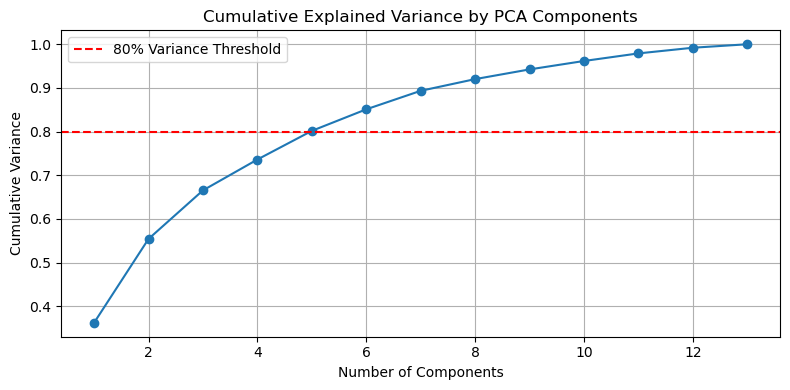

Number of components to retain ≥80% variance: 5


In [12]:
# === Step 2: PCA (Preserve ≥ 80% of Variance) ===

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_wine)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Plot cumulative explained variance
explained = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(explained)+1), explained, marker='o')
plt.axhline(y=0.80, color='r', linestyle='--', label="80% Variance Threshold")
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Variance")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Select components needed to reach 80% variance
n_components = np.argmax(explained >= 0.80) + 1
print(f"Number of components to retain ≥80% variance: {n_components}")

# Slice the transformed PCA matrix
X_reduced = X_pca[:, :n_components]


c:\Users\12292\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\12292\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\12292\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\12292\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Window

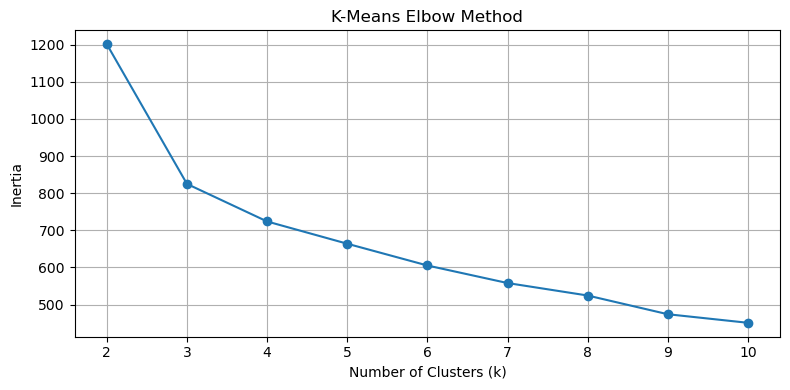

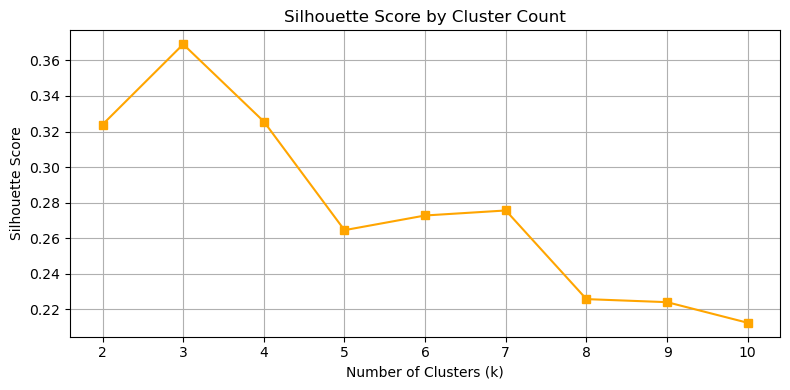

In [13]:
# === Step 3: K-Means Clustering – Elbow and Silhouette ===

inertia = []
silhouette = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_reduced)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X_reduced, kmeans.labels_))

# Plot Inertia (Elbow Method)
plt.figure(figsize=(8, 4))
plt.plot(K_range, inertia, marker='o')
plt.title("K-Means Elbow Method")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Silhouette Scores
plt.figure(figsize=(8, 4))
plt.plot(K_range, silhouette, marker='s', color='orange')
plt.title("Silhouette Score by Cluster Count")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.tight_layout()
plt.show()


c:\Users\12292\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


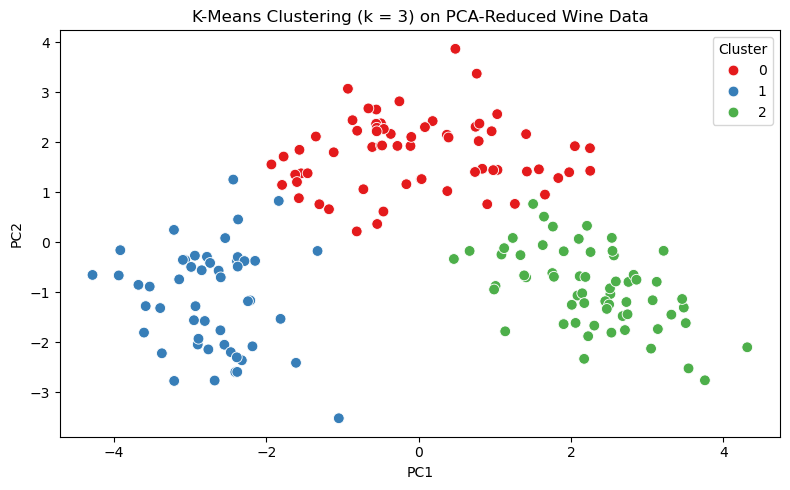

In [14]:
# === Step 4: Final K-Means Clustering (k = 3) ===

k_final = 3
kmeans_final = KMeans(n_clusters=k_final, n_init=10, random_state=42)
clusters_kmeans = kmeans_final.fit_predict(X_reduced)

# Add cluster labels to PCA DataFrame
df_kmeans = pd.DataFrame(X_reduced, columns=[f"PC{i+1}" for i in range(X_reduced.shape[1])])
df_kmeans['Cluster'] = clusters_kmeans

# Visualize first two PCA components with cluster labels
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_kmeans, x="PC1", y="PC2", hue="Cluster", palette="Set1", s=60)
plt.title("K-Means Clustering (k = 3) on PCA-Reduced Wine Data")
plt.tight_layout()
plt.show()


In [18]:
from scipy.cluster.hierarchy import linkage, fcluster

# Recompute linkage if needed
Z = linkage(X_reduced, method='complete', metric='euclidean')

# Assign clusters from hierarchical dendrogram
hier_clusters = fcluster(Z, t=3, criterion='maxclust')

# Add HierCluster column
df_kmeans['HierCluster'] = hier_clusters


In [19]:
# Crosstab comparison
comparison = pd.crosstab(df_kmeans['Cluster'], df_kmeans['HierCluster'])
print("K-Means vs. Hierarchical Clustering Comparison:")
display(comparison)


K-Means vs. Hierarchical Clustering Comparison:


HierCluster,1,2,3
Cluster,,,
0,21,0,44
1,2,48,1
2,0,0,62


### Comparison of Clustering Results

The comparison between K-Means and hierarchical clustering reveals strong agreement, particularly for two of the three clusters. K-Means Cluster 2 maps exactly to Hierarchical Cluster 3 (62/62), while Cluster 1 corresponds nearly perfectly to Hierarchical Cluster 2. K-Means Cluster 0 shows moderate internal division, split between Hierarchical Clusters 1 and 3. This divergence likely reflects different sensitivity to inter-point distances and linkage criteria.

Overall, the agreement supports the conclusion that the underlying structure of the wine dataset is stable and observable across clustering methods, particularly after PCA preprocessing.
